# Fundamentos de NLP

In [1]:
# Bibliotecas
# !pip install wikipedia==1.4.0
# !pip install spacy==2.2.4
# !python -m spacy download en
# !python -m spacy download pt
# !pip install unidecode==1.2.0
# !pip install gensim==3.8.3
# !pip install texthero==1.0.9

# Tokenização

In [2]:
import string
from unidecode import unidecode

import wikipedia
import wikipediaapi

import nltk
from nltk.probability import FreqDist
# nltk.download("stopwords")
# nltk.download('punkt')
# nltk.download('rslp')

import re
import spacy
import texthero as hero

import pandas as pd

In [3]:
# wikipedia.set_lang('pt')
wiki = wikipediaapi.Wikipedia('pt')

In [5]:
# pagina = wikipedia.page('Processamento de linguagem natural')
# print('URL: ', pagina.URL)
# print(pagina.content)

pagina = wiki.page('Processamento de linguagem natural')
print("Page - Exists: %s" % pagina.exists())
print("Page - Title: %s" % pagina.title)
print("Page - Summary: %s" % pagina.summary)
print("Page - Text: %s" % pagina.text)

Page - Exists: True
Page - Title: Processamento de linguagem natural
Page - Summary: Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.
Page - Text: Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de g

In [6]:
corpus = pagina.text
corpus.split()

['Processamento',
 'de',
 'língua',
 'natural',
 '(PLN)',
 'é',
 'uma',
 'subárea',
 'da',
 'ciência',
 'da',
 'computação,',
 'inteligência',
 'artificial',
 'e',
 'da',
 'linguística',
 'que',
 'estuda',
 'os',
 'problemas',
 'da',
 'geração',
 'e',
 'compreensão',
 'automática',
 'de',
 'línguas',
 'humanas',
 'naturais.',
 'Sistemas',
 'de',
 'geração',
 'de',
 'língua',
 'natural',
 'convertem',
 'informação',
 'de',
 'bancos',
 'de',
 'dados',
 'de',
 'computadores',
 'em',
 'linguagem',
 'compreensível',
 'ao',
 'ser',
 'humano',
 'e',
 'sistemas',
 'de',
 'compreensão',
 'de',
 'língua',
 'natural',
 'convertem',
 'ocorrências',
 'de',
 'linguagem',
 'humana',
 'em',
 'representações',
 'mais',
 'formais,',
 'mais',
 'facilmente',
 'manipuláveis',
 'por',
 'programas',
 'de',
 'computador.',
 'Alguns',
 'desafios',
 'do',
 'PLN',
 'são',
 'compreensão',
 'de',
 'língua',
 'natural,',
 'fazer',
 'com',
 'que',
 'computadores',
 'extraiam',
 'sentido',
 'de',
 'linguagem',
 'huma

## Capitalização


In [7]:
tokens = corpus.lower().split()
tokens

['processamento',
 'de',
 'língua',
 'natural',
 '(pln)',
 'é',
 'uma',
 'subárea',
 'da',
 'ciência',
 'da',
 'computação,',
 'inteligência',
 'artificial',
 'e',
 'da',
 'linguística',
 'que',
 'estuda',
 'os',
 'problemas',
 'da',
 'geração',
 'e',
 'compreensão',
 'automática',
 'de',
 'línguas',
 'humanas',
 'naturais.',
 'sistemas',
 'de',
 'geração',
 'de',
 'língua',
 'natural',
 'convertem',
 'informação',
 'de',
 'bancos',
 'de',
 'dados',
 'de',
 'computadores',
 'em',
 'linguagem',
 'compreensível',
 'ao',
 'ser',
 'humano',
 'e',
 'sistemas',
 'de',
 'compreensão',
 'de',
 'língua',
 'natural',
 'convertem',
 'ocorrências',
 'de',
 'linguagem',
 'humana',
 'em',
 'representações',
 'mais',
 'formais,',
 'mais',
 'facilmente',
 'manipuláveis',
 'por',
 'programas',
 'de',
 'computador.',
 'alguns',
 'desafios',
 'do',
 'pln',
 'são',
 'compreensão',
 'de',
 'língua',
 'natural,',
 'fazer',
 'com',
 'que',
 'computadores',
 'extraiam',
 'sentido',
 'de',
 'linguagem',
 'huma

### Frequência dos tokens


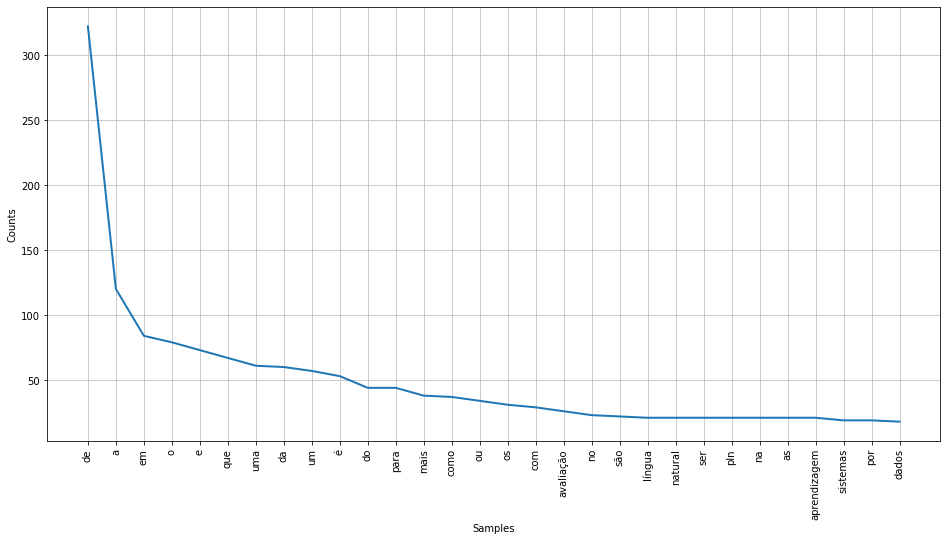

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
frequencia_palavras = FreqDist(tokens)
frequencia_palavras.plot(30)

## Stopwords


In [9]:
from nltk.corpus import stopwords
stopwords_portugues = stopwords.words('portuguese')
print(*stopwords_portugues)

de a o que e é do da em um para com não uma os no se na por mais as dos como mas ao ele das à seu sua ou quando muito nos já eu também só pelo pela até isso ela entre depois sem mesmo aos seus quem nas me esse eles você essa num nem suas meu às minha numa pelos elas qual nós lhe deles essas esses pelas este dele tu te vocês vos lhes meus minhas teu tua teus tuas nosso nossa nossos nossas dela delas esta estes estas aquele aquela aqueles aquelas isto aquilo estou está estamos estão estive esteve estivemos estiveram estava estávamos estavam estivera estivéramos esteja estejamos estejam estivesse estivéssemos estivessem estiver estivermos estiverem hei há havemos hão houve houvemos houveram houvera houvéramos haja hajamos hajam houvesse houvéssemos houvessem houver houvermos houverem houverei houverá houveremos houverão houveria houveríamos houveriam sou somos são era éramos eram fui foi fomos foram fora fôramos seja sejamos sejam fosse fôssemos fossem for formos forem serei será seremos 

In [10]:
tokens_sem_stopwords = []
for palavra in tokens:
    if palavra not in stopwords_portugues:
        tokens_sem_stopwords.append(palavra)
print(*tokens_sem_stopwords)

processamento língua natural (pln) subárea ciência computação, inteligência artificial linguística estuda problemas geração compreensão automática línguas humanas naturais. sistemas geração língua natural convertem informação bancos dados computadores linguagem compreensível ser humano sistemas compreensão língua natural convertem ocorrências linguagem humana representações formais, facilmente manipuláveis programas computador. alguns desafios pln compreensão língua natural, fazer computadores extraiam sentido linguagem humana natural geração língua natural. história história pln começou década 1950, alan turing publicou artigo "computing machinery and intelligence", propunha agora chamado teste turing critério inteligência. 1954, experiência georgetown envolveu tradução automática sessenta frases russas inglês. autores afirmaram dentro três cinco anos tradução automática problema resolvido. entanto, avanços reais lentos previsto e, após relatório alpac 1966, constatou pesquisa dez ano

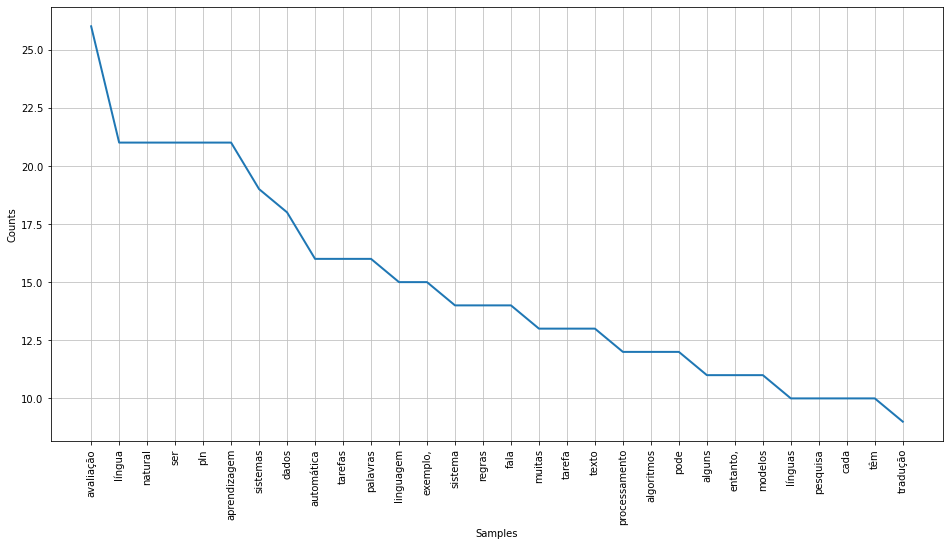

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
plt.figure(figsize=(16, 8))
frequencia_palavras = FreqDist(tokens_sem_stopwords)
frequencia_palavras.plot(30)

In [12]:
def remove_stopwords(tokens, stopwords):
    tokens_sem_stopwords = []
    for palavra in tokens:
        if palavra not in stopwords:
            tokens_sem_stopwords.append(palavra)
    return tokens_sem_stopwords

In [13]:
stopwords_portugues.append('==')
tokens_sem_stopwords = remove_stopwords(tokens, stopwords_portugues)
print(*tokens_sem_stopwords)

processamento língua natural (pln) subárea ciência computação, inteligência artificial linguística estuda problemas geração compreensão automática línguas humanas naturais. sistemas geração língua natural convertem informação bancos dados computadores linguagem compreensível ser humano sistemas compreensão língua natural convertem ocorrências linguagem humana representações formais, facilmente manipuláveis programas computador. alguns desafios pln compreensão língua natural, fazer computadores extraiam sentido linguagem humana natural geração língua natural. história história pln começou década 1950, alan turing publicou artigo "computing machinery and intelligence", propunha agora chamado teste turing critério inteligência. 1954, experiência georgetown envolveu tradução automática sessenta frases russas inglês. autores afirmaram dentro três cinco anos tradução automática problema resolvido. entanto, avanços reais lentos previsto e, após relatório alpac 1966, constatou pesquisa dez ano

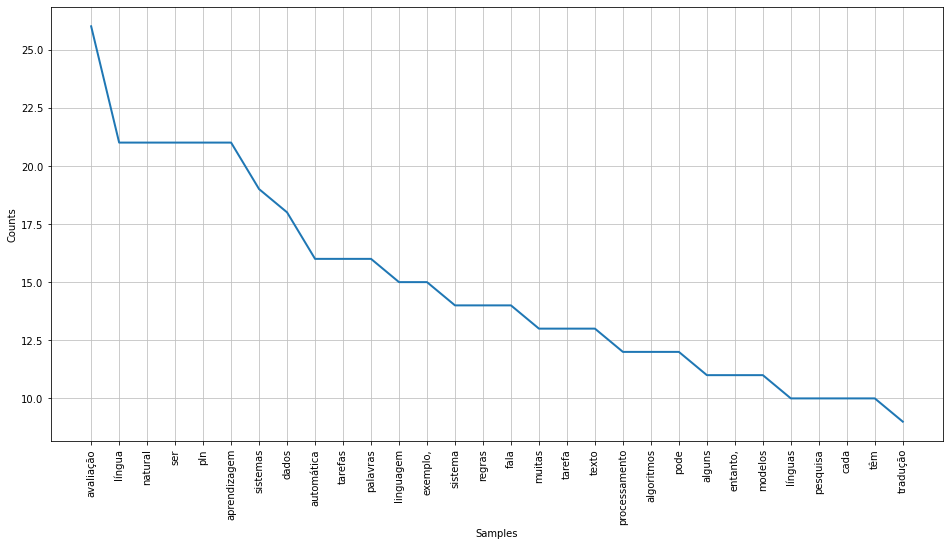

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
plt.figure(figsize=(16, 8))
frequencia_palavras = FreqDist(tokens_sem_stopwords)
frequencia_palavras.plot(30)

### NLTK


In [15]:
tokens_nltk = nltk.word_tokenize(corpus, language='portuguese')
print(*tokens_nltk)

Processamento de língua natural ( PLN ) é uma subárea da ciência da computação , inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais . Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais , mais facilmente manipuláveis por programas de computador . Alguns desafios do PLN são compreensão de língua natural , fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural . História A história do PLN começou na década de 1950 , quando Alan Turing publicou o artigo `` Computing Machinery and Intelligence '' , que propunha o que agora é chamado de teste de Turing como critério de inteligência . Em 1954 , a experiência de Georgetown envolveu a tradução automática de mais de sessenta

 abordagens quantitativas para processamento automatizado de linguagem , incluindo modelagem probabilística , teoria da informação e álgebra linear . A tecnologia para o PLN estatístico vem principalmente da aprendizagem automática e da mineração de dados , que são campos de inteligência artificial que envolvem o aprendizado a partir de dados . Avaliação O objetivo da avaliação do PLN é uma medida de uma ou mais qualidades de um algoritmo ou de um sistema a fim de determinar se o algoritmo atende às metas dos projetistas ou o sistema de atendimento às necessidades de seus usuários . Investigação na avaliação PLN tem ganhado atenção , porque a definição de critérios de avaliação é uma forma de especificar precisamente problemas do PLN . Uma métrica de avaliação de PLN em um sistema algorítmico permite a integração da compreensão de linguagem e geração de linguagem . Um conjunto preciso de critérios de avaliação , que pode ser aplicado principalmente a avaliações métricas , podendo permi

### Expressões Regulares


In [16]:
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
print(*tokens_regex)

Processamento de língua natural ( PLN ) é uma subárea da ciência da computação , inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais . Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais , mais facilmente manipuláveis por programas de computador . Alguns desafios do PLN são compreensão de língua natural , fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural . História A história do PLN começou na década de 1950 , quando Alan Turing publicou o artigo " Computing Machinery and Intelligence " , que propunha o que agora é chamado de teste de Turing como critério de inteligência . Em 1954 , a experiência de Georgetown envolveu a tradução automática de mais de sessenta f

 os sistemas se tornam cada vez mais incontroláveis . No entanto , a criação de mais dados para entrada em sistemas de aprendizado de máquina requer simplesmente um aumento correspondente no número de horas trabalhadas por humanos , geralmente sem aumentos significativos na complexidade do processo de anotação . O subcampo de PLN dedicado a abordagens de aprendizagem é conhecido como aprendizagem de língua natural ( NLL ) e sua conferência , a CoNLL , e orgão central , o SIGNLL , são patrocinados pela ACL , reconhecendo também as suas ligações com linguística computacional e aquisição de linguagem . Quando o objetivo da pesquisa de aprendizagem de linguagem computacional é entender mais sobre aquisição de linguagem humana , ou psicolinguística , a NLL sobrepõe - se no campo relacionado de psicolinguística computacional . Aplicações principais A listagem a seguir traz alguns dos trabalhos mais pesquisadas em PLN . Note que alguns deles têm aplicações no mundo real , enquanto outras serv

Ewan Klein , and Edward Loper ( 2009 ) . Natural Language Processing with Python . O'Reilly Media . ISBN 978 - 0 - 596 - 51649 - 9 . Daniel Jurafsky and James H . Martin ( 2008 ) . Speech and Language Processing , 2nd edition . Pearson Prentice Hall . ISBN 978 - 0 - 13 - 187321 - 6 . Christopher D . Manning , Prabhakar Raghavan , and Hinrich Schütze ( 2008 ) . Introduction to Information Retrieval . Cambridge University Press . ISBN 978 - 0 - 521 - 86571 - 5 . Official html and pdf versions available without charge . Christopher D . Manning and Hinrich Schütze ( 1999 ) . Foundations of Statistical Natural Language Processing . The MIT Press . ISBN 978 - 0 - 262 - 13360 - 9 . David M . W . Powers and Christopher C . R . Turk ( 1989 ) . Machine Learning of Natural Language . Springer - Verlag . ISBN 978 - 0 - 387 - 19557 - 5 .


## Busca com expressões regulares


In [17]:
texto = "Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural. \
Disponível em http://ww.xyz.com ou http://www.xyz.com ou https://wwww.xyz.com, pelo email abc@xyz.com ou abccombr@xyz.com.br ou abcbr@xyz.br, pelos telefones 021-98627-8676 021-98628-8676 021-98629-8676 códigos 021-022 nas datas 2021-12-03, 12-03-2021 e 03/12/2021, e pelo ISBN 978-85-08-13196-9."

In [18]:
re.findall("^Proc\w+", texto)

['Processamento']

In [19]:
re.findall("\d+.$", texto)

['9.']

In [20]:
re.findall("\w+cial", texto)

['artificial']

In [21]:
re.findall("ww+", texto)

['ww', 'www', 'wwww']

In [22]:
re.findall("https?:", texto)

['http:', 'http:', 'https:']

In [23]:
re.findall("h[a-z]*", texto)

['humanas', 'humano', 'humana', 'humana', 'http', 'http', 'https']

In [24]:
re.findall("[012]{3,5}", texto)

['021', '021', '021', '021', '022', '2021', '2021', '2021']

In [25]:
print(*re.findall("[a-zA-Z]{5}", texto))

Proce ssame natur compu intel artif icial lingu stica estud probl compr autom nguas human natur Siste natur conve infor banco dados compu tador lingu compr human siste compr natur conve ocorr ncias lingu human repre senta forma facil mente manip progr compu tador Algun desaf compr natur fazer compu tador extra senti lingu human natur natur Dispo https email abcco abcbr pelos telef digos datas


In [26]:
print(*re.findall("em|um|to", texto))

to um em to um em em em em um em em em um em em um em em


In [27]:
re.findall('(\d{3})-\d{5}-\d{4}', texto)

['021', '021', '021']

In [28]:
print(*re.findall("[a-z]\w[a-z]", texto))

roc ess ame nto lín gua nat ura uma sub rea iên cia com put int eli gên cia art ifi cia lin uís tic que est uda pro ble mas ger com pre ens aut mát ica lín gua hum ana nat ura ist ema ger lín gua nat ura con ver tem inf orm ban cos dad com put ado res lin gua gem com pre ens vel ser hum ano sis tem com pre ens lín gua nat ura con ver tem oco rên cia lin gua gem hum ana rep res ent mai for mai mai fac ilm ent man ipu láv eis por pro gra mas com put ado lgu des afi são com pre ens lín gua nat ura faz com que com put ado res ext rai sen tid lin gua gem hum ana nat ura ger lín gua nat ura isp nív htt xyz com htt www xyz com htt www xyz com pel ema abc xyz com abc com xyz com abc xyz pel tel efo nes cód igo nas dat pel


In [29]:
print(*re.findall("[a-z]\W[a-z]", texto))

o d e l a n a s a d a c a d a c a a l e a l a q e e a o s p s d a g o e o a a d e l s h s n s d e g o d e l a n l c m i o d e b s d e d s d e c s e m l m c l a o s r h o e s d e c o d e l a n l c m o s d e l m h a e m r s m s f s f e m s p r p s d e c s d s d o c o d e l a n r c m q e c s e m s o d e l m h a o u n l e o d e l a n l e m h w.x z.c m o u h w.x z.c m o u h w.x z.c o e l a c@x z.c m o u a r@x z.c m.b r o u a r@x z.b s t s d e p


In [30]:
print(*re.findall("[0-9]\s[0-9]", texto))

6 0 6 0


In [31]:
print(*re.findall("[0-9]\S[0-9]", texto))

021 986 7-8 676 021 986 8-8 676 021 986 9-8 676 021 022 202 1-1 2-0 2-0 3-2 021 3/1 2/2 021 978 5-0 8-1 319 6-9


In [32]:
print(*re.findall("\s[a-z]{6}\s", texto))

 estuda   bancos   humano   humana   humana 


In [33]:
re.findall("(\s\d+)", texto)

[' 021', ' 021', ' 021', ' 021', ' 2021', ' 12', ' 03', ' 978']

In [34]:
re.findall("\d{2}-\d{2}-\d{4}", texto)

['12-03-2021', '85-08-1319']

In [35]:
re.findall("(\s\D+)", texto)

[' de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural. Disponível em http://ww.xyz.com ou http://www.xyz.com ou https://wwww.xyz.com, pelo email abc@xyz.com ou abccombr@xyz.com.br ou abcbr@xyz.br, pelos telefones ',
 ' códigos ',
 ' nas datas ',
 ' e ',
 ' e pelo ISBN ']

In [36]:
re.findall("\w+@\w+", texto) 

['abc@xyz', 'abccombr@xyz', 'abcbr@xyz']

In [37]:
re.findall("[ISBN]{4}[ ]{0,1}[0-9]{3}[-]{1}[0-9]{2}[-]{1}[0-9]{2}[-]{1}[0-9]{5}[-]{1}[0-9]{0,1}", texto)

['ISBN 978-85-08-13196-9']

## Remoção de dígitos numéricos


In [38]:
tokens_regex = re.sub("(\s\d+)", "", str(tokens_regex))
tokens_regex

'[\'Processamento\', \'de\', \'língua\', \'natural\', \'(\', \'PLN\', \')\', \'é\', \'uma\', \'subárea\', \'da\', \'ciência\', \'da\', \'computação\', \',\', \'inteligência\', \'artificial\', \'e\', \'da\', \'linguística\', \'que\', \'estuda\', \'os\', \'problemas\', \'da\', \'geração\', \'e\', \'compreensão\', \'automática\', \'de\', \'línguas\', \'humanas\', \'naturais\', \'.\', \'Sistemas\', \'de\', \'geração\', \'de\', \'língua\', \'natural\', \'convertem\', \'informação\', \'de\', \'bancos\', \'de\', \'dados\', \'de\', \'computadores\', \'em\', \'linguagem\', \'compreensível\', \'ao\', \'ser\', \'humano\', \'e\', \'sistemas\', \'de\', \'compreensão\', \'de\', \'língua\', \'natural\', \'convertem\', \'ocorrências\', \'de\', \'linguagem\', \'humana\', \'em\', \'representações\', \'mais\', \'formais\', \',\', \'mais\', \'facilmente\', \'manipuláveis\', \'por\', \'programas\', \'de\', \'computador\', \'.\', \'Alguns\', \'desafios\', \'do\', \'PLN\', \'são\', \'compreensão\', \'de\', \

## Remoção Pontuação


In [39]:
tokens_regex.translate(str.maketrans('', '', string.punctuation))

'Processamento de língua natural  PLN  é uma subárea da ciência da computação  inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais  Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais  mais facilmente manipuláveis por programas de computador  Alguns desafios do PLN são compreensão de língua natural  fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural  História A história do PLN começou na década de 1950  quando Alan Turing publicou o artigo  Computing Machinery and Intelligence   que propunha o que agora é chamado de teste de Turing como critério de inteligência  Em 1954  a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas 

## Remoção Acentos


In [40]:
tokens_regex = unidecode(tokens_regex)
tokens_regex

'[\'Processamento\', \'de\', \'lingua\', \'natural\', \'(\', \'PLN\', \')\', \'e\', \'uma\', \'subarea\', \'da\', \'ciencia\', \'da\', \'computacao\', \',\', \'inteligencia\', \'artificial\', \'e\', \'da\', \'linguistica\', \'que\', \'estuda\', \'os\', \'problemas\', \'da\', \'geracao\', \'e\', \'compreensao\', \'automatica\', \'de\', \'linguas\', \'humanas\', \'naturais\', \'.\', \'Sistemas\', \'de\', \'geracao\', \'de\', \'lingua\', \'natural\', \'convertem\', \'informacao\', \'de\', \'bancos\', \'de\', \'dados\', \'de\', \'computadores\', \'em\', \'linguagem\', \'compreensivel\', \'ao\', \'ser\', \'humano\', \'e\', \'sistemas\', \'de\', \'compreensao\', \'de\', \'lingua\', \'natural\', \'convertem\', \'ocorrencias\', \'de\', \'linguagem\', \'humana\', \'em\', \'representacoes\', \'mais\', \'formais\', \',\', \'mais\', \'facilmente\', \'manipulaveis\', \'por\', \'programas\', \'de\', \'computador\', \'.\', \'Alguns\', \'desafios\', \'do\', \'PLN\', \'sao\', \'compreensao\', \'de\', \

## Texthero


In [41]:
texto = pd.Series(corpus)

In [42]:
#Aplica tokenização
hero.tokenize(texto).values[0]

['Processamento',
 'de',
 'língua',
 'natural',
 '(',
 'PLN',
 ')',
 'é',
 'uma',
 'subárea',
 'da',
 'ciência',
 'da',
 'computação',
 ',',
 'inteligência',
 'artificial',
 'e',
 'da',
 'linguística',
 'que',
 'estuda',
 'os',
 'problemas',
 'da',
 'geração',
 'e',
 'compreensão',
 'automática',
 'de',
 'línguas',
 'humanas',
 'naturais',
 '.',
 'Sistemas',
 'de',
 'geração',
 'de',
 'língua',
 'natural',
 'convertem',
 'informação',
 'de',
 'bancos',
 'de',
 'dados',
 'de',
 'computadores',
 'em',
 'linguagem',
 'compreensível',
 'ao',
 'ser',
 'humano',
 'e',
 'sistemas',
 'de',
 'compreensão',
 'de',
 'língua',
 'natural',
 'convertem',
 'ocorrências',
 'de',
 'linguagem',
 'humana',
 'em',
 'representações',
 'mais',
 'formais',
 ',',
 'mais',
 'facilmente',
 'manipuláveis',
 'por',
 'programas',
 'de',
 'computador',
 '.',
 'Alguns',
 'desafios',
 'do',
 'PLN',
 'são',
 'compreensão',
 'de',
 'língua',
 'natural',
 ',',
 'fazer',
 'com',
 'que',
 'computadores',
 'extraiam',
 'se

In [43]:
#Remove numeros
hero.remove_digits(texto).values[0]

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\nHistória\nA história do PLN começou na década de  , quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm  , a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas p

In [44]:
#Remove pontuação
hero.remove_punctuation(texto).values[0]

'Processamento de língua natural  PLN  é uma subárea da ciência da computação  inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais  Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais  mais facilmente manipuláveis por programas de computador  Alguns desafios do PLN são compreensão de língua natural  fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural \n\nHistória\nA história do PLN começou na década de 1950  quando Alan Turing publicou o artigo  Computing Machinery and Intelligence  que propunha o que agora é chamado de teste de Turing como critério de inteligência \nEm 1954  a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases rus

In [45]:
#Remove parênteses
hero.remove_brackets(texto).values[0]

'Processamento de língua natural  é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\nHistória\nA história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas 

In [46]:
#Remove espaços em brancos
hero.remove_whitespace(texto).values[0]

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural. História A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência. Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases russas 

In [47]:
#Remove stopwords
portugues_stops = stopwords.words('portuguese')
hero.remove_stopwords(texto, portugues_stops).values[0]

'Processamento  língua natural (PLN)   subárea  ciência  computação, inteligência artificial   linguística  estuda  problemas  geração  compreensão automática  línguas humanas naturais. Sistemas  geração  língua natural convertem informação  bancos  dados  computadores  linguagem compreensível  ser humano  sistemas  compreensão  língua natural convertem ocorrências  linguagem humana  representações  formais,  facilmente manipuláveis  programas  computador. Alguns desafios  PLN  compreensão  língua natural, fazer   computadores extraiam sentido  linguagem humana  natural  geração  língua natural.\n\nHistória\nA história  PLN começou  década  1950,  Alan Turing publicou  artigo "Computing Machinery and Intelligence",  propunha   agora  chamado  teste  Turing  critério  inteligência.\nEm 1954,  experiência  Georgetown envolveu  tradução automática    sessenta frases russas   inglês. Os autores afirmaram  dentro  três  cinco anos  tradução automática   problema resolvido. No entanto,  avan

In [48]:
#Remove URL
hero.remove_urls(texto).values[0]

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\nHistória\nA história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases ru

In [49]:
str_texto = ' '.join(texto)
str_texto

'Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.\n\nHistória\nA história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.\nEm 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases ru

## Stemização


In [50]:
from nltk.stem.rslp import RSLPStemmer

def executa_stem(tokens):
    tokens_apos_stem = []
    stemmer = RSLPStemmer()
    for palavra in tokens:
        tokens_apos_stem.append(stemmer.stem(palavra))
    return tokens_apos_stem

texto = 'computador computação computabilidade'
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)
tokens_apos_stem = executa_stem(tokens_regex)
print(*tokens_apos_stem)

comput comput comput


## Lematização


In [51]:
import pt_core_news_sm
nlp = pt_core_news_sm.load()

In [60]:
texto = 'estudo estudar estudou estudamos'
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)

str_tokens = ' '.join(tokens_regex)
doc = nlp(str_tokens)
type(doc)

spacy.tokens.doc.Doc

In [61]:
def executa_lemm(tokens):
    tokens_apos_lemm = []
    for token in doc:
        tokens_apos_lemm.append(token.lemma_)
    return tokens_apos_lemm

tokens_apos_lemm = executa_lemm(tokens_regex)
print(*tokens_apos_lemm)

estudar estudar estudar estudar


In [62]:
texto = 'cálculo calculo calcular calculou calculamos'
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)

str_tokens = ' '.join(tokens_regex)
doc = nlp(str_tokens)
type(doc)

spacy.tokens.doc.Doc

In [63]:
def executa_lemm(tokens):
    tokens_apos_lemm = []
    for token in doc:
        tokens_apos_lemm.append(token.lemma_)
    return tokens_apos_lemm

tokens_apos_lemm = executa_lemm(tokens_regex)
print(*tokens_apos_lemm)


cálculo calcular calcular calcular calcular


In [64]:
texto = 'quem descobriu o brasil'

tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)

str_tokens = ' '.join(tokens_regex)
doc = nlp(str_tokens)
type(doc)

spacy.tokens.doc.Doc

In [65]:
tokens_apos_lemm = executa_lemm(tokens_regex)
print(*tokens_apos_lemm)

quem descobrir o brasil


In [66]:
texto = 'o brasil foi descoberto por quem'

tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)

str_tokens = ' '.join(tokens_regex)
doc = nlp(str_tokens)
type(doc)

spacy.tokens.doc.Doc

In [67]:
tokens_apos_lemm = executa_lemm(tokens_regex)
print(*tokens_apos_lemm)


o brasil ser descobrir por quem


In [68]:
texto = 'quem descobiu o brasil'
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)
tokens_apos_stem = executa_stem(tokens_regex)
print(*tokens_apos_stem)

qu descob o brasil


In [69]:
texto = 'o brasil foi descoberto por quem'
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", texto)
tokens_apos_stem = executa_stem(tokens_regex)
print(*tokens_apos_stem)

o brasil foi descobert por qu


# Modelos de Linguagem

## N-Grams

In [70]:
from nltk.util import ngrams

bigrams = ngrams(sequence=nltk.word_tokenize(str_texto), n=2)
for grams in bigrams:
    print(*grams)

Processamento de
de língua
língua natural
natural (
( PLN
PLN )
) é
é uma
uma subárea
subárea da
da ciência
ciência da
da computação
computação ,
, inteligência
inteligência artificial
artificial e
e da
da linguística
linguística que
que estuda
estuda os
os problemas
problemas da
da geração
geração e
e compreensão
compreensão automática
automática de
de línguas
línguas humanas
humanas naturais
naturais .
. Sistemas
Sistemas de
de geração
geração de
de língua
língua natural
natural convertem
convertem informação
informação de
de bancos
bancos de
de dados
dados de
de computadores
computadores em
em linguagem
linguagem compreensível
compreensível ao
ao ser
ser humano
humano e
e sistemas
sistemas de
de compreensão
compreensão de
de língua
língua natural
natural convertem
convertem ocorrências
ocorrências de
de linguagem
linguagem humana
humana em
em representações
representações mais
mais formais
formais ,
, mais
mais facilmente
facilmente manipuláveis
manipuláveis por
por programas
progra

horas trabalhadas
trabalhadas por
por humanos
humanos ,
, geralmente
geralmente sem
sem aumentos
aumentos significativos
significativos na
na complexidade
complexidade do
do processo
processo de
de anotação.O
anotação.O subcampo
subcampo de
de PLN
PLN dedicado
dedicado a
a abordagens
abordagens de
de aprendizagem
aprendizagem é
é conhecido
conhecido como
como aprendizagem
aprendizagem de
de língua
língua natural
natural (
( NLL
NLL )
) e
e sua
sua conferência
conferência ,
, a
a CoNLL
CoNLL ,
, e
e orgão
orgão central
central ,
, o
o SIGNLL
SIGNLL ,
, são
são patrocinados
patrocinados pela
pela ACL
ACL ,
, reconhecendo
reconhecendo também
também as
as suas
suas ligações
ligações com
com linguística
linguística computacional
computacional e
e aquisição
aquisição de
de linguagem
linguagem .
. Quando
Quando o
o objetivo
objetivo da
da pesquisa
pesquisa de
de aprendizagem
aprendizagem de
de linguagem
linguagem computacional
computacional é
é entender
entender mais
mais sobre
sobre aquisiçã

) ,
, mas
mas às
às vezes
vezes perguntas
perguntas abertas
abertas também
também são
são consideradas
consideradas (
( como
como ``
`` Qual
Qual é
é o
o significado
significado da
da vida
vida ?
? ''
'' )
) .
. Trabalhos
Trabalhos recentes
recentes têm
têm analisado
analisado questões
questões ainda
ainda mais
mais complexas.Extração
complexas.Extração de
de relacionamento
relacionamento Identifica
Identifica as
as relações
relações entre
entre entidades
entidades nomeadas
nomeadas (
( por
por exemplo
exemplo ,
, quem
quem é
é casado
casado com
com quem
quem )
) com
com base
base em
em textos.Quebra
textos.Quebra de
de frases
frases (
( sentence
sentence boundary
boundary disambiguation
disambiguation )
) Encontra
Encontra os
os limites
limites da
da frase
frase em
em um
um pedaço
pedaço de
de texto
texto .
. Os
Os limites
limites de
de frases
frases são
são normalmente
normalmente marcadas
marcadas por
por pontos
pontos ou
ou outros
outros sinais
sinais de
de pontuação
pontuação ,
, 

; Mas
Mas este
este tipo
tipo de
de avaliação
avaliação é
é mais
mais informativo
informativo no
no que
que diz
diz respeito
respeito à
à análise
análise de
de erros
erros ou
ou desenvolvimentos
desenvolvimentos futuros
futuros de
de um
um sistema
sistema .
. Automática
Automática vs.
vs. avaliação
avaliação manual
manual Em
Em muitos
muitos casos
casos ,
, procedimentos
procedimentos automáticos
automáticos podem
podem ser
ser definidos
definidos para
para avaliar
avaliar um
um sistema
sistema de
de PLN
PLN ,
, comparando
comparando sua
sua saída
saída com
com o
o padrão
padrão de
de excelência
excelência .
. Embora
Embora o
o custo
custo de
de reproduzir
reproduzir o
o padrão
padrão de
de excelência
excelência possa
possa ser
ser bastante
bastante elevado
elevado ,
, avaliação
avaliação automática
automática de
de bootstrapping
bootstrapping sobre
sobre os
os mesmos
mesmos dados
dados de
de entrada
entrada pode
pode ser
ser repetida
repetida quantas
quantas vezes
vezes for
for necess

In [71]:
trigrams = ngrams(sequence=nltk.word_tokenize(str_texto), n=3)
for grams in trigrams:
    print(*grams)

Processamento de língua
de língua natural
língua natural (
natural ( PLN
( PLN )
PLN ) é
) é uma
é uma subárea
uma subárea da
subárea da ciência
da ciência da
ciência da computação
da computação ,
computação , inteligência
, inteligência artificial
inteligência artificial e
artificial e da
e da linguística
da linguística que
linguística que estuda
que estuda os
estuda os problemas
os problemas da
problemas da geração
da geração e
geração e compreensão
e compreensão automática
compreensão automática de
automática de línguas
de línguas humanas
línguas humanas naturais
humanas naturais .
naturais . Sistemas
. Sistemas de
Sistemas de geração
de geração de
geração de língua
de língua natural
língua natural convertem
natural convertem informação
convertem informação de
informação de bancos
de bancos de
bancos de dados
de dados de
dados de computadores
de computadores em
computadores em linguagem
em linguagem compreensível
linguagem compreensível ao
compreensível ao ser
ao ser humano
ser huma

baseiam-se na aprendizagem
na aprendizagem mecânica
aprendizagem mecânica ,
mecânica , especialmente
, especialmente na
especialmente na aprendizagem
na aprendizagem de
aprendizagem de máquinas
de máquinas estatísticas
máquinas estatísticas .
estatísticas . O
. O paradigma
O paradigma da
paradigma da aprendizagem
da aprendizagem mecânica
aprendizagem mecânica é
mecânica é diferente
é diferente do
diferente do da
do da maioria
da maioria das
maioria das tentativas
das tentativas anteriores
tentativas anteriores de
anteriores de processamento
de processamento da
processamento da linguagem
da linguagem .
linguagem . Anteriormente
. Anteriormente ,
Anteriormente , implementações
, implementações de
implementações de tarefas
de tarefas de
tarefas de processamento
de processamento de
processamento de linguagem
de linguagem envolviam
linguagem envolviam a
envolviam a codificação
a codificação direta
codificação direta de
direta de grandes
de grandes conjuntos
grandes conjuntos de
conjuntos de

numa frase como
frase como ``
como `` Ele
`` Ele entrou
Ele entrou na
entrou na casa
na casa de
casa de João
de João pela
João pela porta
pela porta da
porta da frente
da frente ''
frente '' ,
'' , ``
, `` a
`` a porta
a porta da
porta da frente
da frente ''
frente '' é
'' é uma
é uma expressão
uma expressão de
expressão de referência
de referência e
referência e a
e a relação
a relação da
relação da ponte
da ponte a
ponte a ser
a ser identificada
ser identificada é
identificada é o
é o fato
o fato de
fato de que
de que a
que a porta
a porta a
porta a ser
a ser referida
ser referida é
referida é a
é a porta
a porta da
porta da frente
da frente de
frente de John
de John 's
John 's (
's ( ao
( ao invés
ao invés de
invés de alguma
de alguma outra
alguma outra estrutura
outra estrutura que
estrutura que também
que também pode
também pode ser
pode ser referida
ser referida )
referida ) .Análise
) .Análise do
.Análise do Discurso
do Discurso Esta
Discurso Esta rubrica
Esta rubrica inclui
rub

marcadas por pontos
por pontos ou
pontos ou outros
ou outros sinais
outros sinais de
sinais de pontuação
de pontuação ,
pontuação , mas
, mas esses
mas esses mesmos
esses mesmos caracteres
mesmos caracteres podem
caracteres podem servir
podem servir outros
servir outros propósitos.Análise
outros propósitos.Análise de
propósitos.Análise de subjetividade
de subjetividade (
subjetividade ( sentiment
( sentiment analysis
sentiment analysis ou
analysis ou opinion
ou opinion mining
opinion mining )
mining ) Extrai
) Extrai informações
Extrai informações subjetivas
informações subjetivas geralmente
subjetivas geralmente de
geralmente de um
de um conjunto
um conjunto de
conjunto de documentos
de documentos ,
documentos , muitas
, muitas vezes
muitas vezes usando
vezes usando revisões
usando revisões online
revisões online para
online para determinar
para determinar a
determinar a ``
a `` polaridade
`` polaridade ''
polaridade '' sobre
'' sobre objetos
sobre objetos específicos
objetos específi

, francês ,
francês , alemão
, alemão e
alemão e italiano
e italiano )
italiano ) .
) . Na
. Na França
Na França ,
França , o
, o projeto
o projeto Grace
projeto Grace comparou
Grace comparou um
comparou um conjunto
um conjunto de
conjunto de 21
de 21 marcadores
21 marcadores para
marcadores para o
para o francês
o francês em
francês em 1997
em 1997 (
1997 ( Adda
( Adda 1999
Adda 1999 )
1999 ) .
) . Em
. Em 2004
Em 2004 ,
2004 , durante
, durante o
durante o projeto
o projeto Technolangue
projeto Technolangue /
Technolangue / Easy
/ Easy ,
Easy , foram
, foram comparados
foram comparados 13
comparados 13 analisadores
13 analisadores para
analisadores para o
para o francês
o francês .
francês . A
. A avaliação
A avaliação em
avaliação em larga
em larga escala
larga escala dos
escala dos analisadores
dos analisadores de
analisadores de dependência
de dependência foi
dependência foi realizada
foi realizada no
realizada no contexto
no contexto das
contexto das tarefas
das tarefas compartil

## Bag of Words

In [72]:
corpus = nltk.tokenize.sent_tokenize(pagina.text)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vect_bag = CountVectorizer(binary=True)

In [74]:
docs_bag = vect_bag.fit_transform(corpus)

In [75]:
print(*vect_bag.get_feature_names())

10 13 13360 187321 1950 1954 19557 1964 1966 1970 1975 1976 1977 1978 1979 1980 1981 1983 1984 1987 1988 1989 1991 1994 1996 1997 1998 1999 2004 2006 2007 2008 2009 2011 2014 21 262 2nd 387 51649 521 596 60 80 86571 978 abertas abordagem abordagens abrange abrangem absurda acima acl acordo adda adequadamente adicionais adicional adjetivo adjetivos afirmaram afirmação aglutinada agora agregar agrupada agrupados ai ainda ajudar alan alemanha alemães alemão algoritmo algoritmos algorítmico algum alguma algumas alguns alguém alocação alpac além ambiguidade ambígua ambíguas amostra analisado analisador analisadores analysis analógico and anos anotador anotados anotação anr anteriores anteriormente antes antigos anáfora análise análises ao aos apenas aplicadas aplicado aplicações aprender aprendidos aprendizado aprendizagem após aquelas aquisição architecture armazenar artesanais artificial artigo artigos as assim assistida associadas assumption atende atendimento atenção atos através atribu

In [76]:
print(*docs_bag.toarray())

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 1 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0] [0 0 0 ...

In [77]:
vect_bag2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
docs_bag2 = vect_bag2.fit_transform(corpus)
vect_bag2.get_feature_names()

['10 analisadores',
 '13 187321',
 '13 analisadores',
 '1950 quando',
 '1954 experiência',
 '1964 1966',
 '1966 que',
 '1970 muitos',
 '1975 sam',
 '1976 qualm',
 '1977 politics',
 '1978 pam',
 '1978 talespin',
 '1979 plot',
 '1980 maioria',
 '1980 no',
 '1983 iniciou',
 '1984 1988',
 '1987 primeira',
 '1988 liderado',
 '1991 por',
 '1994 na',
 '1996 campanha',
 '1997 adda',
 '2004 durante',
 '2006 2007',
 '2007 2009',
 '2007 foram',
 '2009 2011',
 '2011 2014',
 '2014 para',
 '21 marcadores',
 '262 13360',
 '2nd edition',
 '387 19557',
 '521 86571',
 '596 51649',
 '60 foram',
 '80 quando',
 '978 13',
 '978 262',
 '978 387',
 '978 521',
 '978 596',
 'abertas também',
 'abordagem baseada',
 'abordagem da',
 'abordagem não',
 'abordagens baseadas',
 'abordagens de',
 'abordagens quantitativas',
 'abrange reconhecimento',
 'abrange tarefas',
 'abrangem várias',
 'absurda para',
 'acima especialmente',
 'acl reconhecendo',
 'acordo inter',
 'adda 1999',
 'adequadamente segmentação',
 'adici

## TF-IDF

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vect.set_params(ngram_range=(1, 2))
vect.set_params(max_df=0.5)
vect.set_params(min_df=2)
docs_tfidf = vect.fit_transform(corpus)

In [79]:
print(docs_tfidf.shape)

(154, 802)


In [80]:
print(vect.get_feature_names())

['13', '1966', '1980', '1991', '1998', '1999', '2007', '2008', '2009', '978', 'abordagem', 'abordagens', 'abrange', 'agora', 'ai', 'ai complete', 'alemão', 'algoritmos', 'algoritmos de', 'alguma', 'algumas', 'algumas línguas', 'alguns', 'alguns casos', 'alguns dos', 'além', 'ambiguidade', 'amostra', 'analisador', 'analisadores', 'analisadores para', 'and', 'and hinrich', 'anos', 'anotados', 'anotação', 'análise', 'análise de', 'análises', 'análises possíveis', 'ao', 'ao invés', 'aos', 'apenas', 'aplicações', 'aprender', 'aprendizado', 'aprendizado de', 'aprendizagem', 'aprendizagem automática', 'aprendizagem de', 'aprendizagem mecânica', 'aquisição', 'aquisição de', 'artificial', 'artigo', 'as', 'as abordagens', 'as línguas', 'através', 'até', 'aumento', 'automaticamente', 'automatizado', 'automática', 'automática aprendizado', 'automática de', 'avaliar', 'avaliação', 'avaliação automática', 'avaliação da', 'avaliação de', 'avaliação em', 'avaliação extrínseca', 'avaliação intrínseca',

In [81]:
df=pd.DataFrame(docs_tfidf.T.todense(), index=vect.get_feature_names(), columns=["doc"+str(i+1) for i in range(0,len(corpus))])
df

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,...,doc145,doc146,doc147,doc148,doc149,doc150,doc151,doc152,doc153,doc154
13,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.0,0.0,0.230503,0.0,0.233045,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
às,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
às regras,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
árvores,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
print(*df.loc['processamento'])

0.14387045151356218 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1475228062052693 0.139654631625371 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.20341903590338842 0.260746925164117 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.20227203440183597 0.10850325447226312 0.0 0.0 0.0 0.23547789287238735 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.16841993405537495 0.0 0.0 0.0 0.0 0.27718963719519507 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [83]:
print(*docs_tfidf)

  (0, 209)	0.1837931749962473
  (0, 66)	0.17498683823516206
  (0, 606)	0.1951465176997072
  (0, 167)	0.1951465176997072
  (0, 405)	0.1951465176997072
  (0, 164)	0.1951465176997072
  (0, 106)	0.1951465176997072
  (0, 163)	0.1951465176997072
  (0, 574)	0.1951465176997072
  (0, 433)	0.14387045151356218
  (0, 208)	0.15178989938428517
  (0, 611)	0.16170799683916035
  (0, 498)	0.17498683823516206
  (0, 388)	0.1951465176997072
  (0, 434)	0.1476318577257211
  (0, 64)	0.12669066965966203
  (0, 126)	0.15178989938428517
  (0, 375)	0.16779153719026624
  (0, 605)	0.16779153719026624
  (0, 521)	0.10843328106886313
  (0, 631)	0.08572659566194334
  (0, 428)	0.16779153719026624
  (0, 54)	0.1951465176997072
  (0, 404)	0.1837931749962473
  (0, 132)	0.1951465176997072
  (0, 105)	0.1951465176997072
  (0, 159)	0.3797847246796839
  (0, 768)	0.0849128576631914
  (0, 572)	0.10561316057817989
  (0, 499)	0.13163021991974003
  (0, 432)	0.13163021991974003
  (0, 609)	0.14387045151356218   (0, 191)	0.15596870608438

In [86]:
corpus[150]

'David M. W. Powers and Christopher C. R. Turk (1989).'